Train Data Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

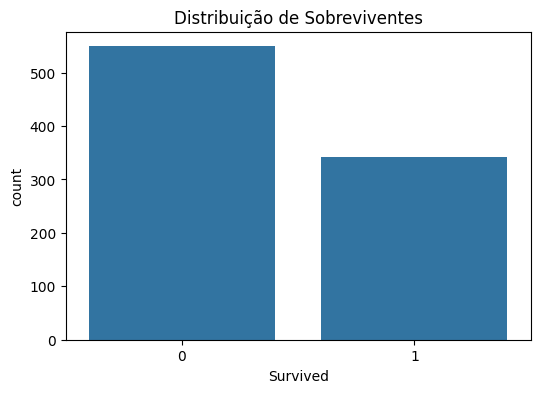

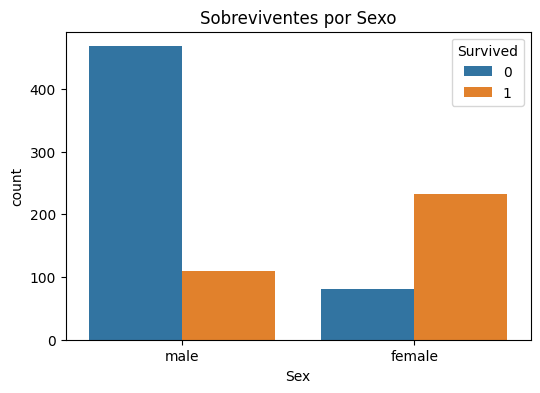

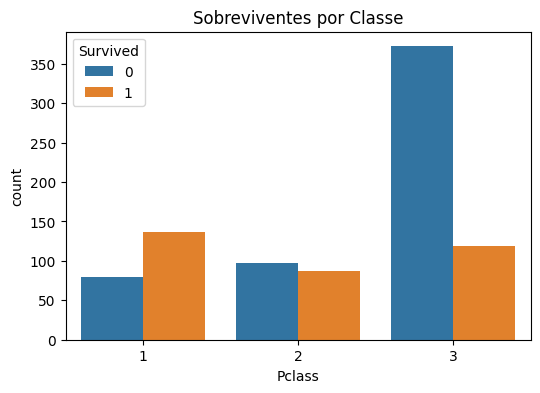

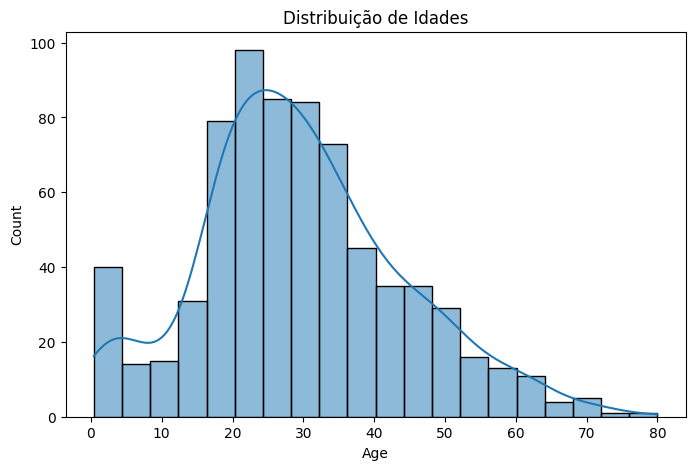

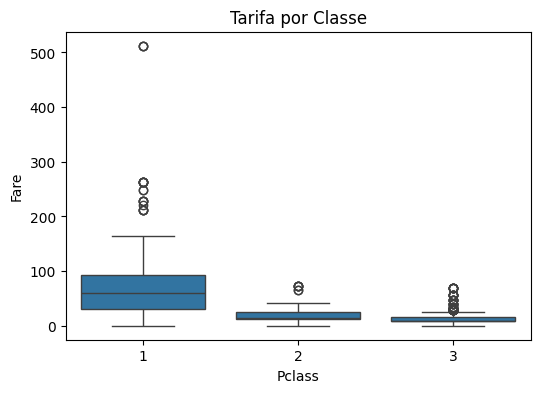

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Primeiras linhas
print("Train Data Head:")
print(train_df.head())
print("\nTest Data Head:")
print(test_df.head())

# Informações gerais
print("\nTrain Data Info:")
train_df.info()
print("\nTest Data Info:")
test_df.info()

# Estatísticas descritivas
print("\nTrain Data Describe:")
print(train_df.describe())

# Valores ausentes
print("\nTrain Data - Valores Ausentes:")
print(train_df.isnull().sum())
print("\nTest Data - Valores Ausentes:")
print(test_df.isnull().sum())

# Visualizações
# Sobreviventes
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df)
plt.title('Distribuição de Sobreviventes')
plt.show()

# Sobreviventes por sexo
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Sobreviventes por Sexo')
plt.show()

# Sobreviventes por classe
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Sobreviventes por Classe')
plt.show()

# Histograma de Idade
plt.figure(figsize=(8, 5))
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Distribuição de Idades')
plt.show()

# Boxplot de Tarifa por Classe
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title('Tarifa por Classe')
plt.show()

In [ ]:
# Imputar Age
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# Imputar Embarked
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Imputar Fare
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Criar Has_Cabin
train_df['Has_Cabin'] = train_df['Cabin'].notnull().astype(int)
test_df['Has_Cabin'] = test_df['Cabin'].notnull().astype(int)

# Converter Sex
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# One-hot Embarked
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Emb')
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix='Emb')

# Criar FamilySize
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Selecionar features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Has_Cabin', 'Emb_C', 'Emb_Q', 'Emb_S']
X_train = train_df[features]
y_train = train_df['Survived']
X_test = test_df[features]

# Normalizar Age e Fare
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])

print("\nDados de Treino Pré-processados:")
print(X_train.head())
print("\nDados de Teste Pré-processados:")
print(X_test.head())


Dados de Treino Pré-processados:
   Pclass  Sex       Age      Fare  FamilySize  Has_Cabin  Emb_C  Emb_Q  Emb_S
0       3    0 -0.534891 -0.502445           2          0  False  False   True
1       1    1  0.668392  0.786845           2          1   True  False  False
2       3    1 -0.234070 -0.488854           1          0  False  False   True
3       1    1  0.442776  0.420730           2          1  False  False   True
4       3    0  0.442776 -0.486337           1          0  False  False   True

Dados de Teste Pré-processados:
   Pclass  Sex       Age      Fare  FamilySize  Has_Cabin  Emb_C  Emb_Q  Emb_S
0       3    0  0.405174 -0.490783           1          0  False   True  False
1       3    1  1.345238 -0.507479           2          0  False  False   True
2       2    0  2.473316 -0.453367           1          0  False   True  False
3       3    0 -0.158865 -0.474005           1          0  False  False   True
4       3    1 -0.534891 -0.401017           3          0  False

<ipython-input-7-3930f595329d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
<ipython-input-7-3930f595329d>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

# Modelo Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Validação cruzada
scores = cross_val_score(model, X_train, y_train, cv=5)
print("\nAcurácia Média (Validação Cruzada):", scores.mean())

# Ajuste de Hiperparâmetros (Opcional)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Melhores Parâmetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Validação cruzada com o melhor modelo
best_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Acurácia Média (Validação Cruzada) - Melhor Modelo:", best_scores.mean())

# Treinar o modelo final
final_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42) # Usando os parâmetros iniciais para seguir o tutorial
final_model.fit(X_train, y_train)


Acurácia Média (Validação Cruzada): 0.8170924612390937
Melhores Parâmetros: {'max_depth': 7, 'n_estimators': 50}
Acurácia Média (Validação Cruzada) - Melhor Modelo: 0.8238089259933463


RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Gerar Previsões
predictions = final_model.predict(X_test)

# Criar Arquivo de Submissão
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)

print("\nArquivo de Submissão Criado: submission.csv")


Arquivo de Submissão Criado: submission.csv
